# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

#### 1. Read the dataset

In [193]:
import pandas as pd

# Load the dataset
df = pd.read_csv('covid-data-01-01-2021.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,NaN,NaN,Unknown,Ukraine,2021-01-02 05:22:33,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4007,NaN,NaN,NaN,Nauru,2021-01-02 05:22:33,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4008,NaN,NaN,Niue,New Zealand,2021-01-02 05:22:33,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4009,NaN,NaN,NaN,Tuvalu,2021-01-02 05:22:33,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### 2. Display the top 5 rows in the data

In [11]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### 3. Show the information of the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


#### 4. Show the sum of missing values of features in the dataset

In [20]:
missing_val = df.isnull().sum()
print(missing_val)

FIPS                   746
Admin2                 741
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64


#### 5. Show the number of Confirmed cases by Country

In [34]:
confirmed_by_country = df.groupby('Country_Region')['Confirmed'].sum().reset_index()
confirmed_by_country

,Country_Region,Confirmed
0,Afghanistan,52513
1,Albania,58316
2,Algeria,99897
3,Andorra,8117
4,Angola,17568
...,...,...
195,West Bank and Gaza,139223
196,Winter Olympics 2022,0
197,Yemen,2101
198,Zambia,20997


#### 6. Show the number of Deaths by Country

In [36]:
death_by_country = df.groupby('Country_Region')['Deaths'].sum().reset_index()
death_by_country

,Country_Region,Deaths
0,Afghanistan,2201
1,Albania,1181
2,Algeria,2762
3,Andorra,84
4,Angola,405
...,...,...
195,West Bank and Gaza,1418
196,Winter Olympics 2022,0
197,Yemen,610
198,Zambia,390


#### 7. Show the number of Recovered cases by Country

In [38]:
recovered_by_country = df.groupby('Country_Region')['Recovered'].sum().reset_index()
recovered_by_country

,Country_Region,Recovered
0,Afghanistan,41727
1,Albania,33634
2,Algeria,67395
3,Andorra,7463
4,Angola,11146
...,...,...
195,West Bank and Gaza,118926
196,Winter Olympics 2022,0
197,Yemen,1396
198,Zambia,18773


#### 8. Show the number of Active Cases by Country

In [46]:
active_by_country = df.groupby('Country_Region')['Active'].sum().reset_index()
active_by_country

,Country_Region,Active
0,Afghanistan,8585
1,Albania,23501
2,Algeria,29740
3,Andorra,570
4,Angola,6017
...,...,...
195,West Bank and Gaza,18879
196,Winter Olympics 2022,0
197,Yemen,95
198,Zambia,1834


#### 9. Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [195]:
latest_stats_by_country = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

latest_stats_by_country

,Country_Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,52513,2201,41727,8585
1,Albania,58316,1181,33634,23501
2,Algeria,99897,2762,67395,29740
3,Andorra,8117,84,7463,570
4,Angola,17568,405,11146,6017
...,...,...,...,...,...
195,West Bank and Gaza,139223,1418,118926,18879
196,Winter Olympics 2022,0,0,0,0
197,Yemen,2101,610,1396,95
198,Zambia,20997,390,18773,1834


### 10. Show the countries with no recovered cases

In [197]:
# Filter the countries with no recovered cases
no_recovered_cases = latest_stats_by_country[latest_stats_by_country['Recovered'] == 0]

no_recovered_cases[['Country_Region', 'Recovered']]

,Country_Region,Recovered
5,Antarctica,0
17,Belgium,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
156,Serbia,0
169,Summer Olympics 2020,0
171,Sweden,0
180,Tonga,0


#### 11. Show the countries with no confirmed cases

In [62]:
no_confirmed_cases = latest_stats_by_country[latest_stats_by_country['Confirmed'] == 0]

no_confirmed_cases[['Country_Region', 'Confirmed']]

,Country_Region,Confirmed
5,Antarctica,0
92,Kiribati,0
93,"Korea, North",0
125,Nauru,0
136,Palau,0
169,Summer Olympics 2020,0
180,Tonga,0
184,Tuvalu,0
196,Winter Olympics 2022,0


#### 12. Show the countries with no deaths

In [64]:
no_deaths = latest_stats_by_country[latest_stats_by_country['Deaths'] == 0]

no_deaths[['Country_Region', 'Deaths']]

,Country_Region,Deaths
5,Antarctica,0
20,Bhutan,0
31,Cambodia,0
51,Dominica,0
70,Grenada,0
76,Holy See,0
92,Kiribati,0
93,"Korea, North",0
98,Laos,0
114,Marshall Islands,0


#### 13. Show the countries with no deaths, also show Confirmed, Recovered cases for those countries

In [68]:
no_deaths = latest_stats_by_country[latest_stats_by_country['Deaths'] == 0]

no_deaths[['Country_Region', 'Confirmed', 'Deaths', 'Recovered']]

,Country_Region,Confirmed,Deaths,Recovered
5,Antarctica,0,0,0
20,Bhutan,689,0,449
31,Cambodia,379,0,362
51,Dominica,88,0,83
70,Grenada,127,0,107
76,Holy See,27,0,15
92,Kiribati,0,0,0
93,"Korea, North",0,0,0
98,Laos,41,0,40
114,Marshall Islands,4,0,4


#### 14. Show the Top 10 countries with Confirmed cases

In [199]:
# Group by 'Country_Region' and sum the 'Confirmed', 'Deaths', and 'Recovered' cases
latest_stats_by_country = df.groupby('Country_Region')[['Last_Update', 'Confirmed', 'Deaths', 'Recovered']].max()

# Sort by 'Confirmed' in descending order and select the top 10
top_10_confirmed = latest_stats_by_country.sort_values(by='Confirmed', ascending=False).head(10)

top_10_confirmed

,Last_Update,Confirmed,Deaths,Recovered
Country_Region,,,,
France,2021-01-02 05:22:33,2636045,64399,170896
Turkey,2021-01-02 05:22:33,2220855,21093,2114760
United Kingdom,2021-01-02 05:22:33,2190702,81593,2445
India,2021-01-02 05:22:33,1935636,49580,1828546
Argentina,2021-01-02 05:22:33,1629594,43319,1426676
Brazil,2021-01-02 05:22:33,1466191,46775,1287986
Poland,2021-01-02 05:22:33,1305774,28956,1046281
Iran,2021-01-02 05:22:33,1231429,55337,995570
South Africa,2021-01-02 05:22:33,1073887,28887,887701


#### 15. Show the Top 10 Countries with Active cases

In [205]:
# Group by 'Country_Region' and sum the 'Confirmed', 'Deaths', and 'Recovered' cases
latest_stats_by_country = df.groupby('Country_Region')[['Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active']].max()

# Sort by 'Active' in descending order and select the top 10
top_10_Active = latest_stats_by_country.sort_values(by='Active', ascending=False).head(10)

top_10_Active

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
France,2021-01-02 05:22:33,2636045,64399,170896,2400750
United Kingdom,2021-01-02 05:22:33,2190702,81593,2445,2125971
US,2021-04-02 15:13:53,790582,10552,0,780030
Peru,2021-01-02 05:22:33,449514,42170,951318,407344
Spain,2021-01-02 05:22:33,399499,11828,40736,346935
Serbia,2021-01-02 05:22:33,339997,3250,0,336747
Mexico,2021-01-02 05:22:33,334137,19017,1083768,317264
Poland,2021-01-02 05:22:33,1305774,28956,1046281,230537
Netherlands,2021-01-02 05:22:33,204608,2843,5179,200820


#### 16. Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

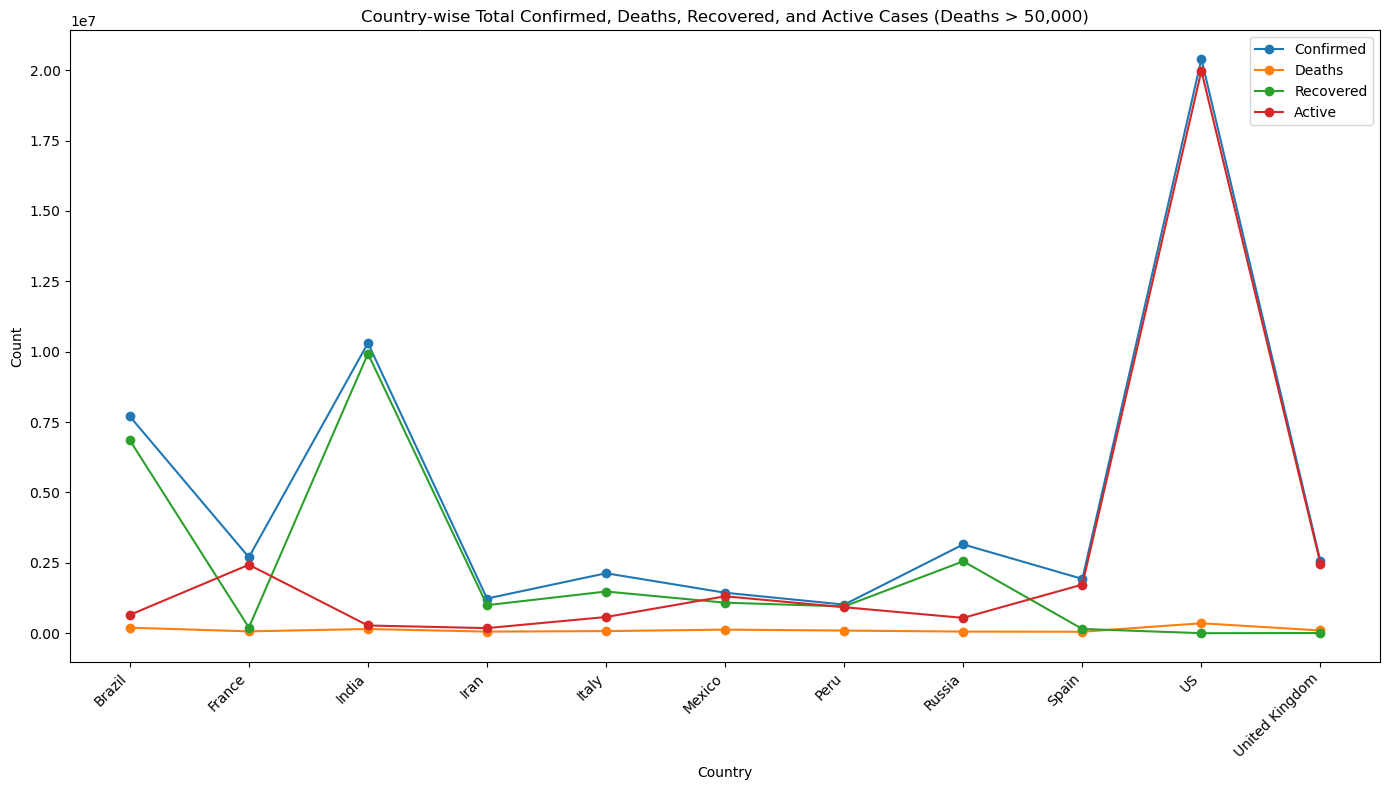

In [146]:
import matplotlib.pyplot as plt


# Group by 'Country_Region' and sum the 'Confirmed', 'Deaths', 'Recovered', and 'Active' cases
latest_stats_by_country = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

# Filter countries where total deaths exceed 50,000
high_death_countries = latest_stats_by_country[latest_stats_by_country['Deaths'] > 50000]

# Plot the data
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each column as a line
for column in ['Confirmed', 'Deaths', 'Recovered', 'Active']:
    ax.plot(high_death_countries['Country_Region'], high_death_countries[column], marker='o', label=column)

# Set the labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Country-wise Total Confirmed, Deaths, Recovered, and Active Cases (Deaths > 50,000)')
ax.legend()
ax.set_xticks(range(len(high_death_countries)))
ax.set_xticklabels(high_death_countries['Country_Region'], rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


### 17. Plot Province/State wise Deaths in USA

In [148]:
import plotly.express as px

In [150]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [152]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

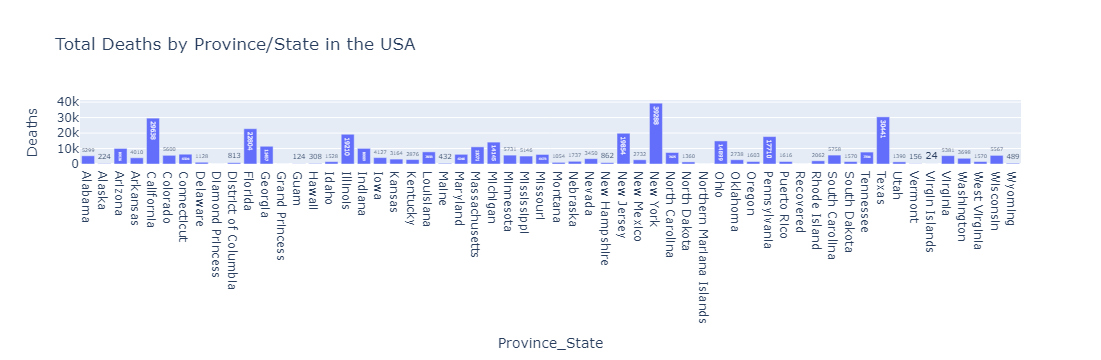

In [168]:
# Filter for data related to the USA
usa_data = covid_data[covid_data['Country_Region'] == 'US']

# Aggregate deaths by Province/State
state_deaths = usa_data.groupby('Province_State')['Deaths'].sum().reset_index()

# Plot the data
fig = px.bar(state_deaths, x='Province_State', y='Deaths', text= 'Deaths', title='Total Deaths by Province/State in the USA')

# Show the plot
fig.show()

### 18. Plot Province/State Wise Active Cases in USA

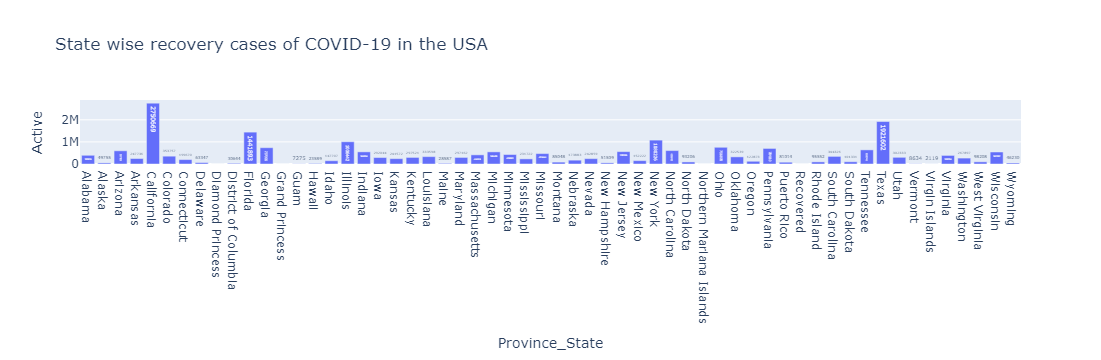

In [174]:
# Aggregate Active by Province/State
active_cases = usa_data.groupby('Province_State')['Active'].sum().reset_index()

# Plot the data
fig = px.bar(active_cases, x='Province_State', y='Active', text= 'Active', title='State wise recovery cases of COVID-19 in the USA')

# Show the plot
fig.show()

### 19. Plot Province/State Wise Confirmed cases in USA

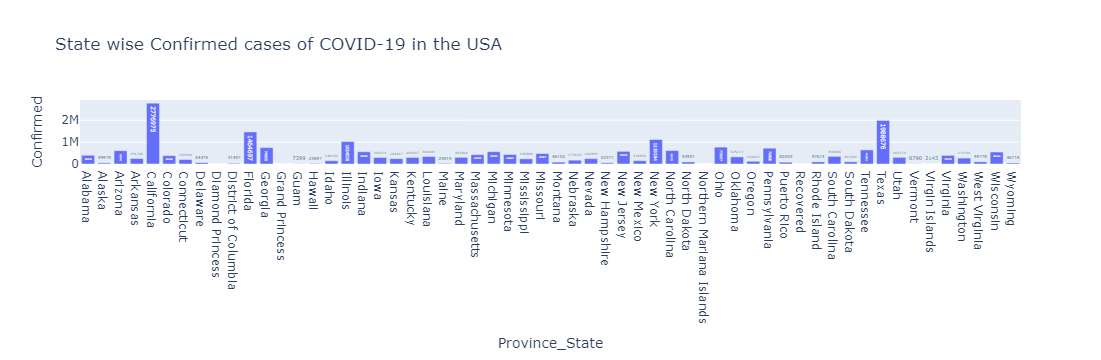

In [176]:
# Aggregate deaths by Province/State
confirmed_cases = usa_data.groupby('Province_State')['Confirmed'].sum().reset_index()

# Plot the data
fig = px.bar(confirmed_cases, x='Province_State', y='Confirmed', text= 'Confirmed', title='State wise Confirmed cases of COVID-19 in the USA')

# Show the plot
fig.show()

### 20. Plot Province/State Wise Confirmed cases in USA, based on case type

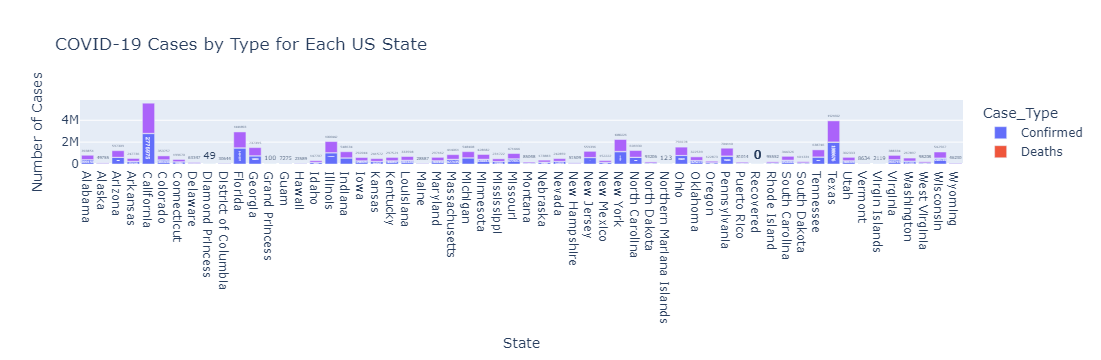

In [184]:
# Aggregate data by Province/State
state_data = usa_data.groupby('Province_State').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
}).reset_index()

# Melt the data for Plotly Express
state_data_melted = state_data.melt(id_vars='Province_State', var_name='Case_Type', value_name='Count')

# Plot the data
fig = px.bar(state_data_melted, x='Province_State', y='Count', color='Case_Type', title='COVID-19 Cases by Type for Each US State', 
             labels={'Count': 'Number of Cases', 'Province_State': 'State'},
             text='Count')

# Update layout to show text labels on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Show the plot
fig.show()

### 21. Plot Worldwide Confirmed Cases over time

In [24]:
import plotly.express as px
import plotly.io as pio

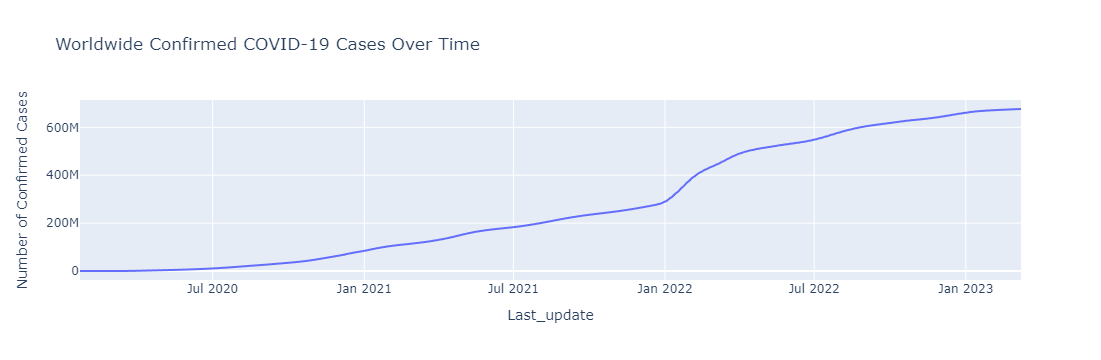

In [207]:
covid_data = pd.read_csv('time_series_covid19_confirmed_global.csv')

# Melt the dataframe to long format to have a 'Date' column and a 'Confirmed' column
covid_data_melted = covid_data.melt(id_vars=['Country/Region', 'Province/State', 'Lat', 'Long'], 
                                     var_name='Date', value_name='Confirmed')

# Convert 'Date' from string to datetime
covid_data_melted['Date'] = pd.to_datetime(covid_data_melted['Date'], format='%m/%d/%y')

# Aggregate confirmed cases globally over time
global_confirmed = covid_data_melted.groupby('Date')['Confirmed'].sum().reset_index()

# Plot the data
fig = px.line(global_confirmed, x='Date', y='Confirmed', 
              title='Worldwide Confirmed COVID-19 Cases Over Time',
              labels={'Confirmed': 'Number of Confirmed Cases', 'Date': 'Last_update'})

# Show the plot
fig.show()